In [68]:
import matplotlib.pyplot as plt
import numpy as np

C:\Users\Prithvi\AppData\Local\Temp\ipykernel_13600\1449092714.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(tick_labels)
C:\Users\Prithvi\AppData\Local\Temp\ipykernel_13600\1449092714.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(tick_labels)


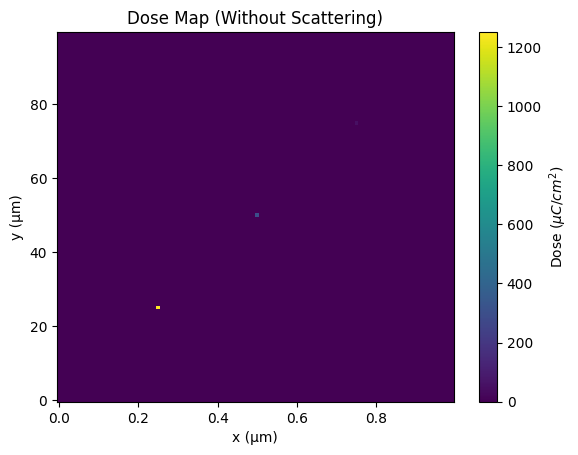

In [191]:
"""PARAMETERS"""
WAFER_SIZE = 1e-6 #m
GRID_SPACING = 1e-8 #m

# Generate empty dose map,
N_CELLS = round(WAFER_SIZE/GRID_SPACING)
current_map = np.zeros((N_CELLS, N_CELLS))
dwell_map = np.zeros((N_CELLS, N_CELLS))
dose_map = (current_map*dwell_map)/GRID_SPACING**2

# Populating dose map,
dose_map[50, 50] = 300 # μC/cm^2
dose_map[25, 25] = 1250 # μC/cm^2
dose_map[75, 75] = 50 # μC/cm^2

# Creating meshgrid,
x, y = np.arange(dose_map.shape[0]), np.arange(dose_map.shape[1])
X, Y = np.meshgrid(x, y)

# Plot the meshgrid,
fig, ax = plt.subplots()
plt.pcolormesh(X, Y, dose_map, shading='auto', cmap='viridis')
plt.title("Dose Map (Without Scattering)")
plt.colorbar(label = r"Dose ($μC/cm^2$)")

# Setting tick labels,
_tick_labels = (ax.get_yticks()*GRID_SPACING*1e6).tolist()
tick_labels = [round(tick_label, 1) for tick_label in _tick_labels]
ax.set_xticklabels(tick_labels)
ax.set_xticklabels(tick_labels)

plt.xlabel("x (μm)")
plt.ylabel("y (μm)")

plt.show()

In [101]:
def dose_proportion(R, delta_R, alpha, beta, eta):
    return (1/(1+eta))*( np.exp(-1*R**2/alpha**2) - np.exp(-1*(R+delta_R)**2/alpha**2) + eta*(np.exp(-1*R**2/beta**2) - np.exp(-1*(R+delta_R)**2/beta**2)) )

C:\Users\Prithvi\AppData\Local\Temp\ipykernel_13600\2972263621.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(tick_labels)
C:\Users\Prithvi\AppData\Local\Temp\ipykernel_13600\2972263621.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(tick_labels)


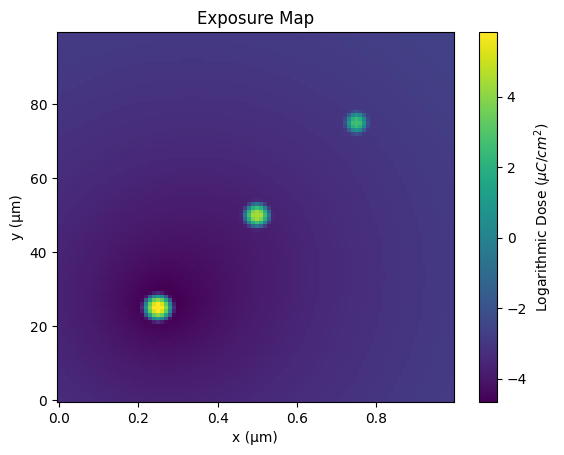

In [192]:
ALPHA = 0.0125 # μm
BETA = 13.226 # μm 
ETA = 0.7398

exposure_map = np.zeros(dose_map.shape)
SPACING = 1e6*GRID_SPACING # μm
dose_locs = [(50, 50), (25, 25), (75, 75)]

for i in range(exposure_map.shape[0]):
    for j in range(exposure_map .shape[1]):

        for dose_loc in dose_locs:
            x, y = dose_loc[0], dose_loc[1]
            R = SPACING*np.sqrt((i-x)**2 + (j-y)**2) # μm
            exposure_contribution = dose_map[x, y]*dose_proportion(R = R, delta_R = SPACING, alpha = ALPHA, beta = BETA, eta = ETA)
            exposure_map[i, j] = exposure_map[i, j] + exposure_contribution

# Plot the meshgrid
fig, ax = plt.subplots()
plt.pcolormesh(X, Y, np.log(exposure_map), shading='auto', cmap='viridis')
plt.title("Exposure Map")
plt.colorbar(label = r"Logarithmic Dose ($\mu C/ cm^2$)")

# Setting tick labels,
_tick_labels = (ax.get_yticks()*GRID_SPACING*1e6).tolist()
tick_labels = [round(tick_label, 1) for tick_label in _tick_labels]
ax.set_xticklabels(tick_labels)
ax.set_xticklabels(tick_labels)

plt.xlabel("x (μm)")
plt.ylabel("y (μm)")
plt.show()